In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns # Pairplot
from dnn_app_utils_v3 import *

#np.random.seed(1)

## Dataset

In [88]:
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
angle           = [0, 45, 90, 135, 180, 225, 270, 315]
cols_Distance   = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub4', 'ANTM Sub5', 'ANTM Sub6', 'ANTM Sub7', 'Distance']
cols_Angle      = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub4', 'ANTM Sub5', 'ANTM Sub6', 'ANTM Sub7', 'Angle']
cols_Module     = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7']
cols_Angle_only = ['Angle']

angle_csv = ['./data/180724_LBS test_2st_ANTM_000.csv',
             './data/180724_LBS test_2st_ANTM_045.csv',
             './data/180724_LBS test_2st_ANTM_090.csv',
             './data/180724_LBS test_2st_ANTM_135.csv',
             './data/180724_LBS test_2st_ANTM_180.csv',
             './data/180724_LBS test_2st_ANTM_225.csv',
             './data/180724_LBS test_2st_ANTM_270.csv',
             './data/180724_LBS test_2st_ANTM_315.csv']

for i in range(8):
    globals()['df_{}'.format(i*45)] = pd.DataFrame()
    globals()['df_{}'.format(i*45)] = pd.read_csv(angle_csv[i], encoding='CP949')
    globals()['df_{}'.format(angle[i])].columns = cols_Distance


df_all = pd.DataFrame()    
df_all = pd.read_csv('./data/180724_LBS test_2st_ANTM_all.csv', encoding='CP949')
df_all.columns = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub4', 'ANTM Sub5', 'ANTM Sub6', 'ANTM Sub7', 'Distance', 'Angle']
 
df_leftright = pd.DataFrame()
df_leftright = pd.read_csv('./data/180724_LBS test_2st_ANTM_all_plus_leftright_012367.csv', encoding='CP949')
df_leftright.columns = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7', 'Distance', 'Angle']

X = df_leftright[cols_Module]
y = df_leftright[cols_Angle_only]

print(X.head())
print(X.tail())
print(y.head())
print(y.tail())

   ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
0         71         75         71         77         77         72
1         71         75         72         78         76         72
2         70         75         72         80         76         72
3         70         75         72         82         76         72
4         70         76         72         83         76         72
      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
1195         78         76         81         80         80         80
1196         78         75         81         80         80         79
1197         78         75         81         79         81         78
1198         78         75         80         79         81         76
1199         78         75         80         78         81         75
   Angle
0      0
1      0
2      0
3      0
4      0
      Angle
1195      1
1196      1
1197      1
1198      1
1199      1


## EX - Pairplot - Angle

각도를 알아내는 부분은 어렵다.

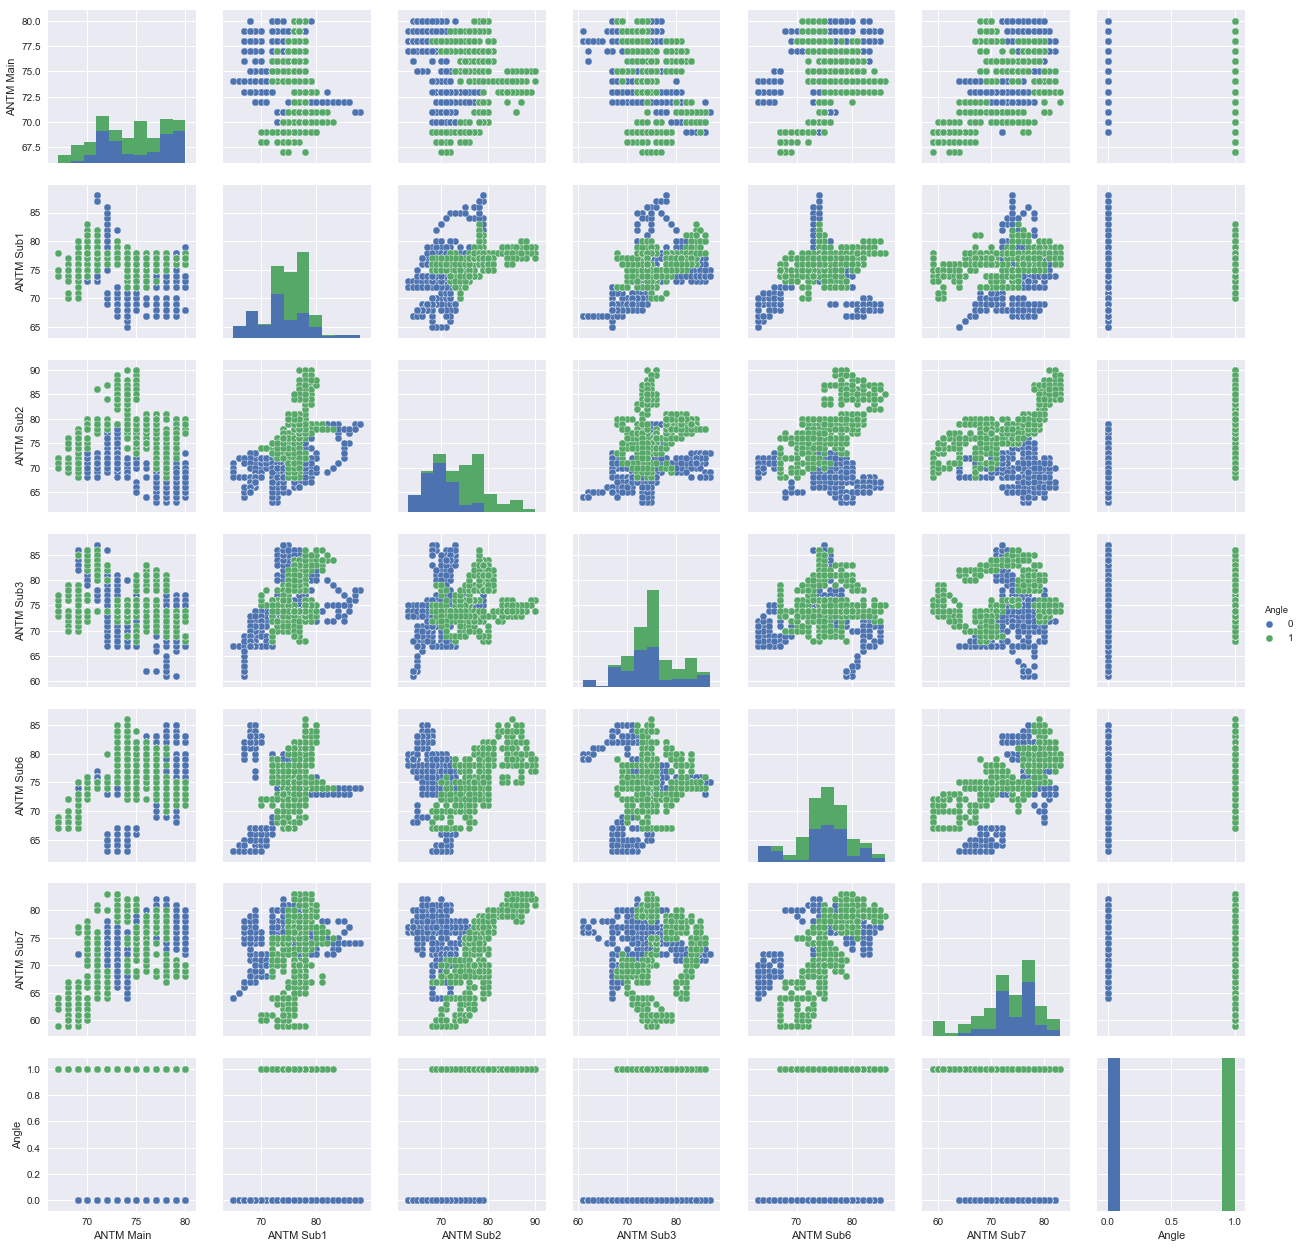

In [92]:
cols_leftright     = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7', 'Angle']
sns.pairplot(data=df_leftright[cols_leftright], hue="Angle")

#sns.pairplot(data=X, hue="Distance")

#sns.pairplot(data=X, hue="Angle")

plt.show()

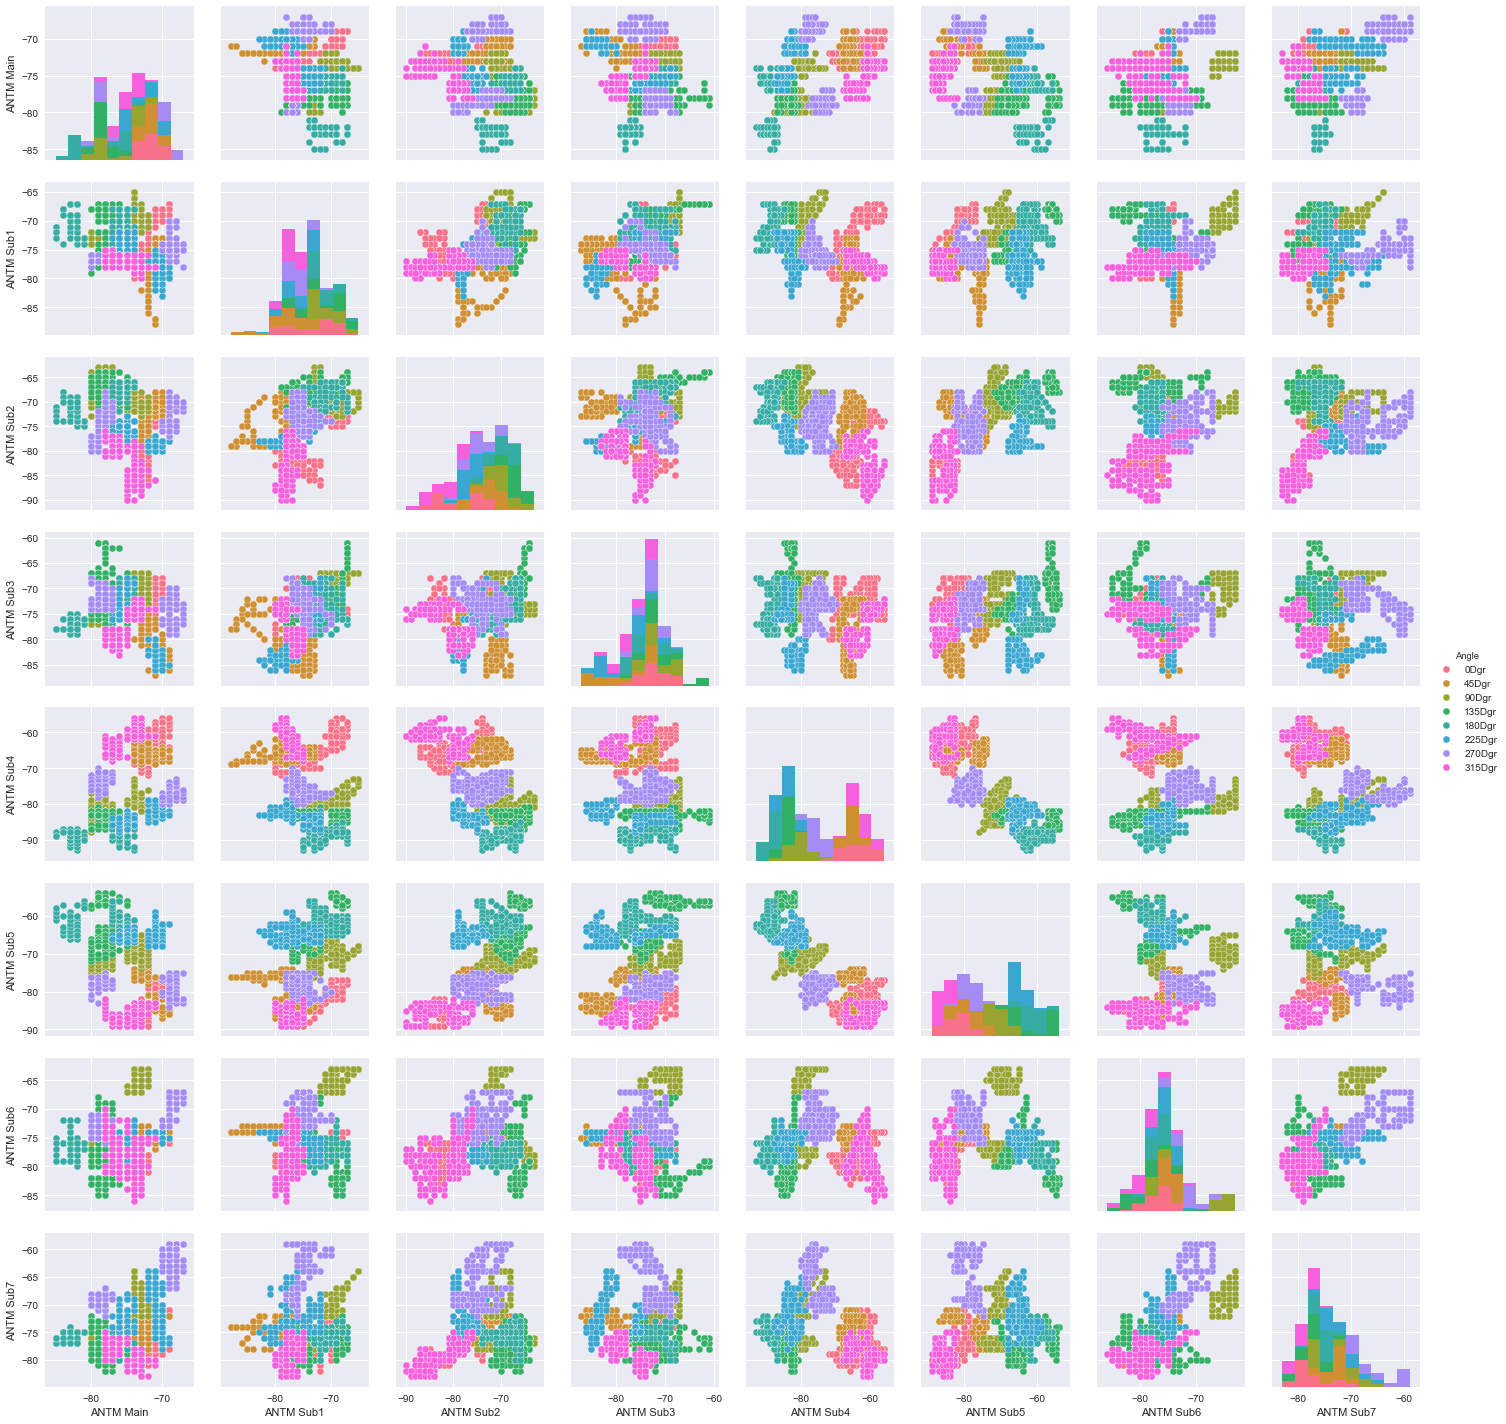

In [91]:
sns.pairplot(data=df_all[cols_Angle], hue="Angle")

plt.show()

## EX - Pairplot - Distance

거리는 비교적 쉽다.

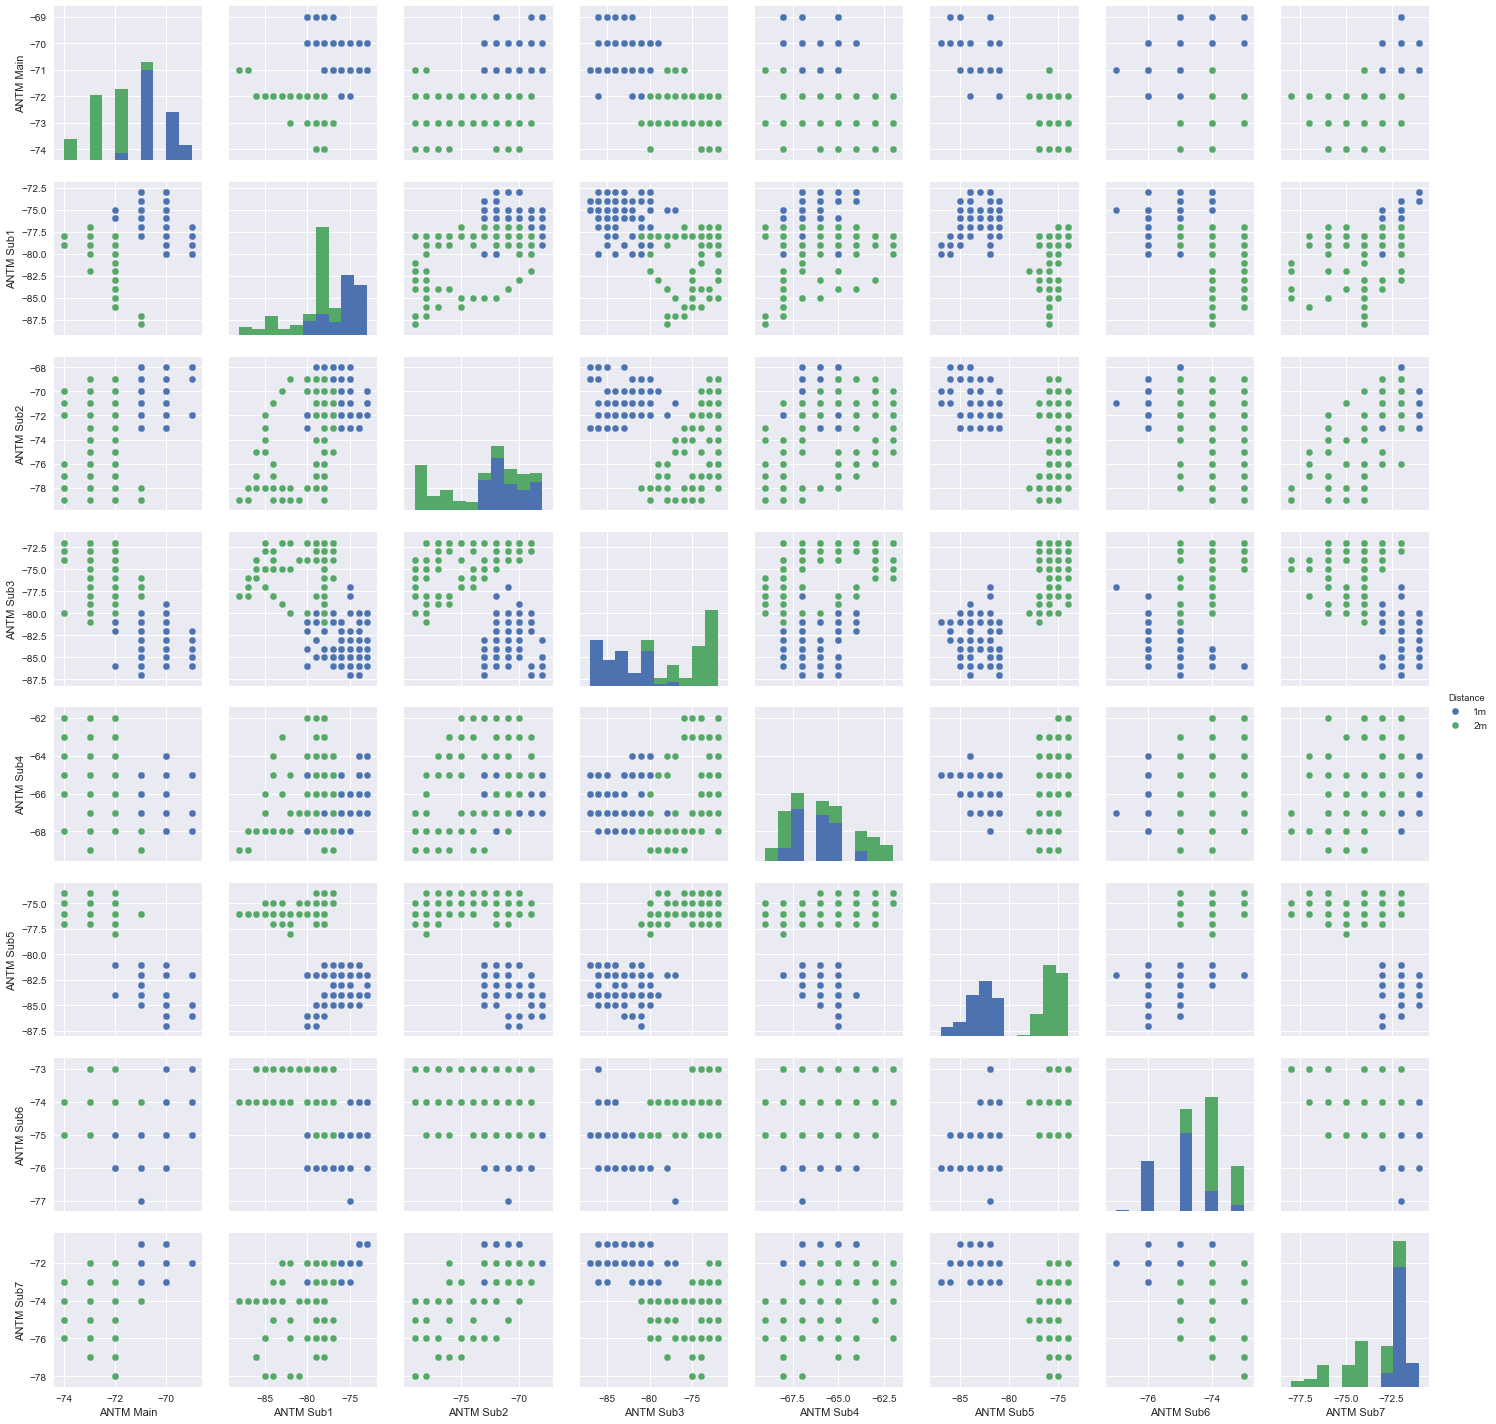

In [93]:
# sns.set(style='whitegrid', context='notebook')
# cols = ['ANT1 Main', 'ANT1 Sub1', 'ANT1 Sub2', 'ANT1 Sub3', 'ANT1 Sub4', 'ANT1 Sub5', 'ANT1 Sub6', 'ANT1 Sub7', 'Distance']
# sns.pairplot(df_000[cols], size=1.5)

#sns.pairplot(df_000[cols], hue="Distance", markers=["o", "D"])
#sns.pairplot(df_000[cols], hue="Distance")
sns.pairplot(data=df_45, hue="Distance")

plt.show()
#sns.reset_orig()

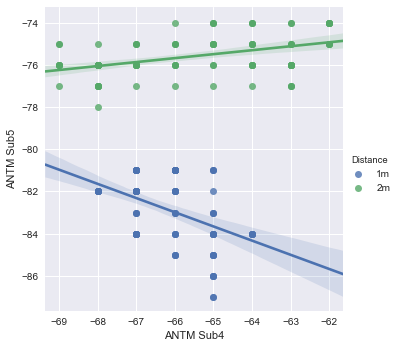

In [61]:
# Seaborn에서 제공하는 희귀 라이브러리
#sns.lmplot(x="ANTM Sub4", y="ANTM Sub5", hue="Distance", data=df_0)
sns.lmplot(x="ANTM Sub4", y="ANTM Sub5", hue="Distance", data=df_45)
#sns.pairplot(df_000, hue="Distance")

plt.show()

## EX - Deep Learning - Left & Right

RSSI 값 기반으로 모듈의 좌우를 판별하는 딥러닝

사용 모듈 : ANTM Main, ANTM Sub1, ANTM Sub2, ANTM Sub3, ANTM Sub6, ANTM Sub7

In [42]:
# 교차검증 (by scikit-learn)
#
# arrays : 데이터
# test_size : 테스트 데이터 사이즈
# train_size : 사이즈
# random_state : 난수 시드

# 사이트 참고
# https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/

# 데이터 변환 사이트 참고
# http://rfriend.tistory.com/tag/XY%EC%B6%95%20%ED%98%95%ED%83%9C%20%EB%B3%80%ED%99%98
from sklearn.model_selection import train_test_split

# 단순 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print('[X_train]')
print(X_train.tail())
print('size of X_train : %.f' %len(X_train.index))
print(' ')
print('[X_test]')
print(X_test.tail())
print('size of X_test : %.f' %len(X_test.index))
print(' ')

print('[y_train]')
print(y_train.tail())
print('size of y_train : %.f' %len(y_train.index))
print(' ')
print('[y_test]')
print(y_test.tail())
print('size of y_test : %.f' %len(y_test.index))
print(' ')

# Explore your dataset 
# 데이터셋 행렬 변환
# X_train, X_test, y_train, y_test

# X_train, X_test가 예제와 다른 것이 아니다
# 예제에서 두 데이터의 shape가 바뀌는 부분이 이곳에 통합되었다.
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

y_train = np.transpose(y_train)
y_test = np.transpose(y_test)

print('[X_train]')
print(X_train)

[X_train]
      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
1044         74         78         79         74         80         79
1095         73         76         84         74         80         83
1130         76         77         80         78         82         79
860          68         75         69         79         67         60
1126         77         78         78         78         81         78
size of X_train : 1080
 
[X_test]
      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
1037         74         78         83         73         78         80
244          72         69         72         68         65         72
158          72         85         72         72         74         74
745          71         79         79         82         74         67
192          72         84         78         75         74         74
size of X_test : 120
 
[y_train]
      Angle
1044      1
1095      1
1130      1
860       1
1126      1

In [43]:
m_train = X_train.shape[1]
m_test = X_test.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("train_x shape: " + str(X_train.shape))
print ("train_y shape: " + str(y_train.shape))
print ("test_x shape: " + str(X_test.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 1080
Number of testing examples: 120
train_x shape: (6, 1080)
train_y shape: (1, 1080)
test_x shape: (6, 120)
test_y shape: (1, 120)


In [44]:
# X_train, X_test, y_train, y_test
train_x = np.array(X_train)
test_x = np.array(X_test)
train_y = np.array(y_train)
test_y = np.array(y_test)

test_y

array([[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 0]], dtype=int64)

## Two-layer neural network

structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [45]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 6
n_h = 6
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [46]:
# GRADED FUNCTION: two_layer_model
# default : learning_rate = 0.0075

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0025, num_iterations = 5000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 500 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 500 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    
    return parameters

Cost after iteration 0: 0.6931239603774909
Cost after iteration 500: 0.6877585534339573
Cost after iteration 1000: 0.6259221165698686
Cost after iteration 1500: 0.5588334172990511
Cost after iteration 2000: 0.5145704580303796
Cost after iteration 2500: 0.4773434768275041
Cost after iteration 3000: 0.44646470771318814
Cost after iteration 3500: 0.42387805214987173
Cost after iteration 4000: 0.40065497222018376
Cost after iteration 4500: 0.38315087955857274
Cost after iteration 5000: 0.37015125020972606
Cost after iteration 5500: 0.3563665290658696
Cost after iteration 6000: 0.34557341547990916
Cost after iteration 6500: 0.3313134256520134
Cost after iteration 7000: 0.3270366986305562
Cost after iteration 7500: 0.32107834353101067
Cost after iteration 8000: 0.3180792410073065
Cost after iteration 8500: 0.311410038210568
Cost after iteration 9000: 0.3002396214772729
Cost after iteration 9500: 0.2989532903381502


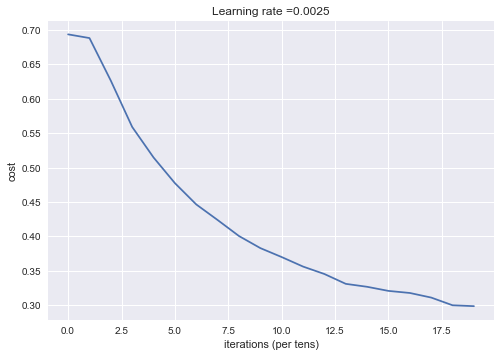

Cost after iteration 9999: 0.2991177979729428


In [47]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 10000, print_cost=True)

In [48]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.875925925926


In [49]:
print(train_x.shape)
print(train_x)
print(train_y.shape)
print(train_y)

(6, 1080)
[[77 78 72 ..., 76 68 77]
 [77 76 78 ..., 77 75 78]
 [71 72 87 ..., 80 69 78]
 [73 74 74 ..., 78 79 78]
 [78 73 75 ..., 82 67 81]
 [78 71 80 ..., 79 60 78]]
(1, 1080)
[[0 1 1 ..., 1 1 1]]


In [50]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.833333333333


## L-layer Neural Network

 structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [51]:
### CONSTANTS ###
#layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
layers_dims = [6, 20, 7, 5, 1] #  4-layer model

In [52]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 500 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters

Cost after iteration 0: 3.772790
Cost after iteration 500: 0.492028
Cost after iteration 1000: 0.439121
Cost after iteration 1500: 0.370393
Cost after iteration 2000: 0.338773
Cost after iteration 2500: 0.341829
Cost after iteration 3000: 0.369390
Cost after iteration 3500: 0.397540
Cost after iteration 4000: 0.361153
Cost after iteration 4500: 0.208384
Cost after iteration 5000: 0.219622
Cost after iteration 5500: 0.175378
Cost after iteration 6000: 0.187407
Cost after iteration 6500: 0.162435
Cost after iteration 7000: 0.139980
Cost after iteration 7500: 0.126751
Cost after iteration 8000: 0.091604
Cost after iteration 8500: 0.085884
Cost after iteration 9000: 0.081100
Cost after iteration 9500: 0.075317


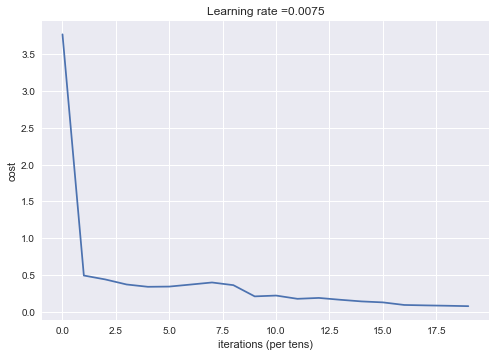

Cost after iteration 9999: 0.071808


In [53]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 10000, print_cost = True)

In [54]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.984259259259


In [55]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.975


## EX - another Dataset

In [19]:
df_extra = pd.DataFrame()
df_extra = pd.read_csv('./data/180724_LBS test_2st_ANTM_all_plus_leftright_012367_extradata03.csv', encoding='CP949')
df_extra.columns = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7', 'Distance', 'Angle']

#df_000.head()
df_extra.tail()

,ANTM Main,ANTM Sub1,ANTM Sub2,ANTM Sub3,ANTM Sub6,ANTM Sub7,Distance,Angle
595,78,61,67,62,75,67,1m,1
596,78,61,67,63,75,67,1m,1
597,78,62,68,63,75,67,1m,1
598,78,62,68,63,75,67,1m,1
599,78,62,68,63,75,67,1m,1


In [20]:
cols_Module = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7']
cols_Angle = ['Angle']


Xe = df_extra[cols_Module]
ye = df_extra[cols_Angle]

print(Xe.head())
print(Xe.tail())
print(ye.head())
print(ye.tail())

   ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
0         69         60         74         67         60         74
1         69         60         75         68         60         74
2         69         60         75         68         61         74
3         70         60         75         68         62         74
4         72         60         75         68         62         74
     ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
595         78         61         67         62         75         67
596         78         61         67         63         75         67
597         78         62         68         63         75         67
598         78         62         68         63         75         67
599         78         62         68         63         75         67
   Angle
0      0
1      0
2      0
3      0
4      0
     Angle
595      1
596      1
597      1
598      1
599      1


In [21]:
Xe = np.transpose(Xe)
ye = np.transpose(ye)

In [22]:
m_train = Xe.shape[1]

print ("Number of extra examples: " + str(m_train))
print ("Xe shape: " + str(Xe.shape))
print ("ye shape: " + str(ye.shape))

Number of extra examples: 600
Xe shape: (6, 600)
ye shape: (1, 600)


In [23]:
# X_train, X_test, y_train, y_test
Xe = np.array(Xe)
ye = np.array(ye)

Xe

array([[69, 69, 69, ..., 78, 78, 78],
       [60, 60, 60, ..., 62, 62, 62],
       [74, 75, 75, ..., 68, 68, 68],
       [67, 68, 68, ..., 63, 63, 63],
       [60, 60, 61, ..., 75, 75, 75],
       [74, 74, 74, ..., 67, 67, 67]], dtype=int64)

In [24]:
pred_test = predict(Xe, ye, parameters)

# 다른 데이터 셋에서는 낮은 정확도를 보임
# 좀 더 많은 데이터 셋이 필요함

Accuracy: 0.526666666667
